In [125]:
!pip install imagehash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [126]:
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import imagehash
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [127]:
!git clone https://github.com/inesfrsantos/MachineLearning.git

fatal: destination path 'MachineLearning' already exists and is not an empty directory.


In [128]:
!ls

ArASL_Database_54K_Final  drive  MachineLearning  sample_data


In [129]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [130]:
import zipfile

with zipfile.ZipFile('/content/MachineLearning/Dataset/ArASL_Database_54K_Final.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [131]:
path = "/content/ArASL_Database_54K_Final"

In [132]:
images = []
labels = []

In [134]:
for folder_name in os.listdir(path):
    folder_path = os.path.join(path, folder_name)
    if not os.path.isdir(folder_path):
        continue
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".jpg") or file_name.endswith(".png"):
            image_path = os.path.join(folder_path, file_name)
            if os.path.isfile(image_path):
                image = Image.open(image_path)
                images.append(image)
                labels.append(folder_name)

df = pd.DataFrame({'image': images, 'label': labels})

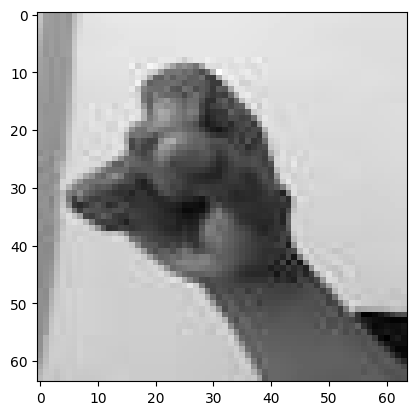

In [135]:
image = df.loc[0, "image"]  # Select the first image in the DataFrame
plt.imshow(image, cmap='gray')
plt.show()

# Exploratory Analysis

Check the Counts of the different signs

In [136]:
#get the total number of pictures in the dataset
num_pics = len(df)
print("Number of pictures in the dataset:\n")
print(num_pics, "\n")

#get the total number of pictures per category and the corresponding percentage
label_counts = df['label'].value_counts()
print("Number and Percentage of pictures per Label:\n")
for label, count in label_counts.items():
    percentage = count/num_pics * 100
    print(f"{label}: {count} ({percentage:.2f}%)")

Number of pictures in the dataset:

68733 

Number and Percentage of pictures per Label:

ghain: 3212 (4.67%)
fa: 3182 (4.63%)
saad: 3020 (4.39%)
ta: 2922 (4.25%)
toot: 2914 (4.24%)
kaaf: 2814 (4.09%)
dha: 2756 (4.01%)
gaaf: 2716 (3.95%)
bb: 2694 (3.92%)
ya: 2654 (3.86%)
seen: 2562 (3.73%)
aleff: 2540 (3.70%)
ha: 2502 (3.64%)
thal: 2442 (3.55%)
al: 2420 (3.52%)
yaa: 2406 (3.50%)
jeem: 2330 (3.39%)
thaa: 2311 (3.36%)
waw: 2054 (2.99%)
zay: 2008 (2.92%)
ain: 1735 (2.52%)
laam: 1465 (2.13%)
nun: 1450 (2.11%)
taa: 1442 (2.10%)
la: 1423 (2.07%)
meem: 1396 (2.03%)
dhad: 1312 (1.91%)
ra: 1277 (1.86%)
dal: 1244 (1.81%)
khaa: 1234 (1.80%)
haa: 1152 (1.68%)
sheen: 1144 (1.66%)


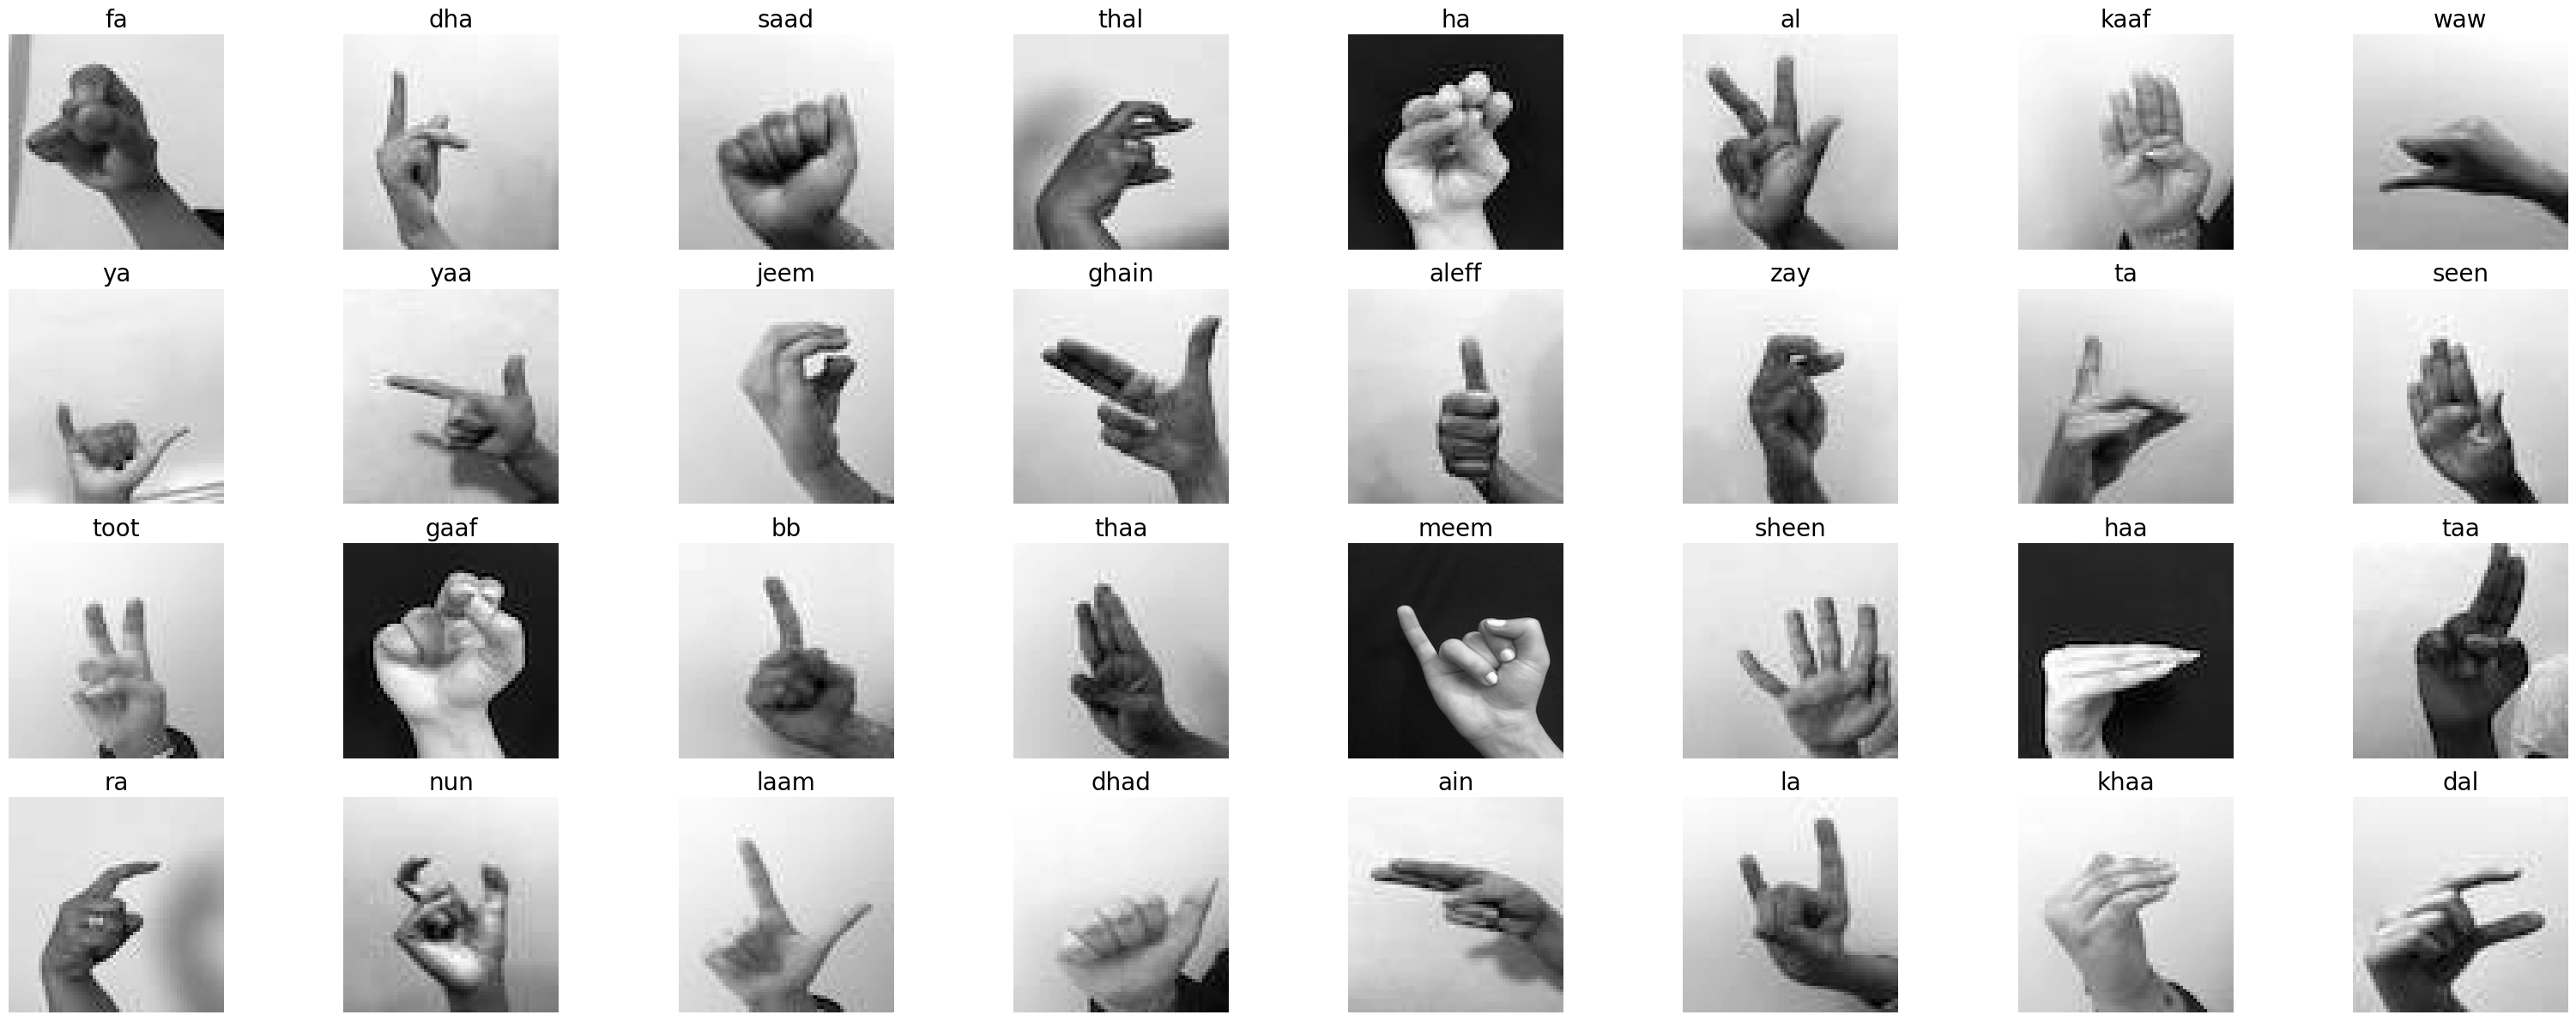

In [137]:
# Examples of all signs

# Get one image for each label
label_to_image = {}
for label in df['label'].unique():
    label_to_image[label] = df[df['label'] == label]['image'].iloc[0]

# Create a figure with subplots
fig, axs = plt.subplots(nrows=int(np.ceil(len(label_to_image) / 8)), ncols=8, figsize=(32, 12))

# Loop over each label and plot the corresponding image
for i, (label, image) in enumerate(label_to_image.items()):
    row = i // 8
    col = i % 8
    axs[row, col].imshow(image, cmap='gray')
    axs[row, col].set_title(label, fontsize=20)
    axs[row, col].axis('off')

# Adjust spacing and display the plot
fig.tight_layout()
plt.show()

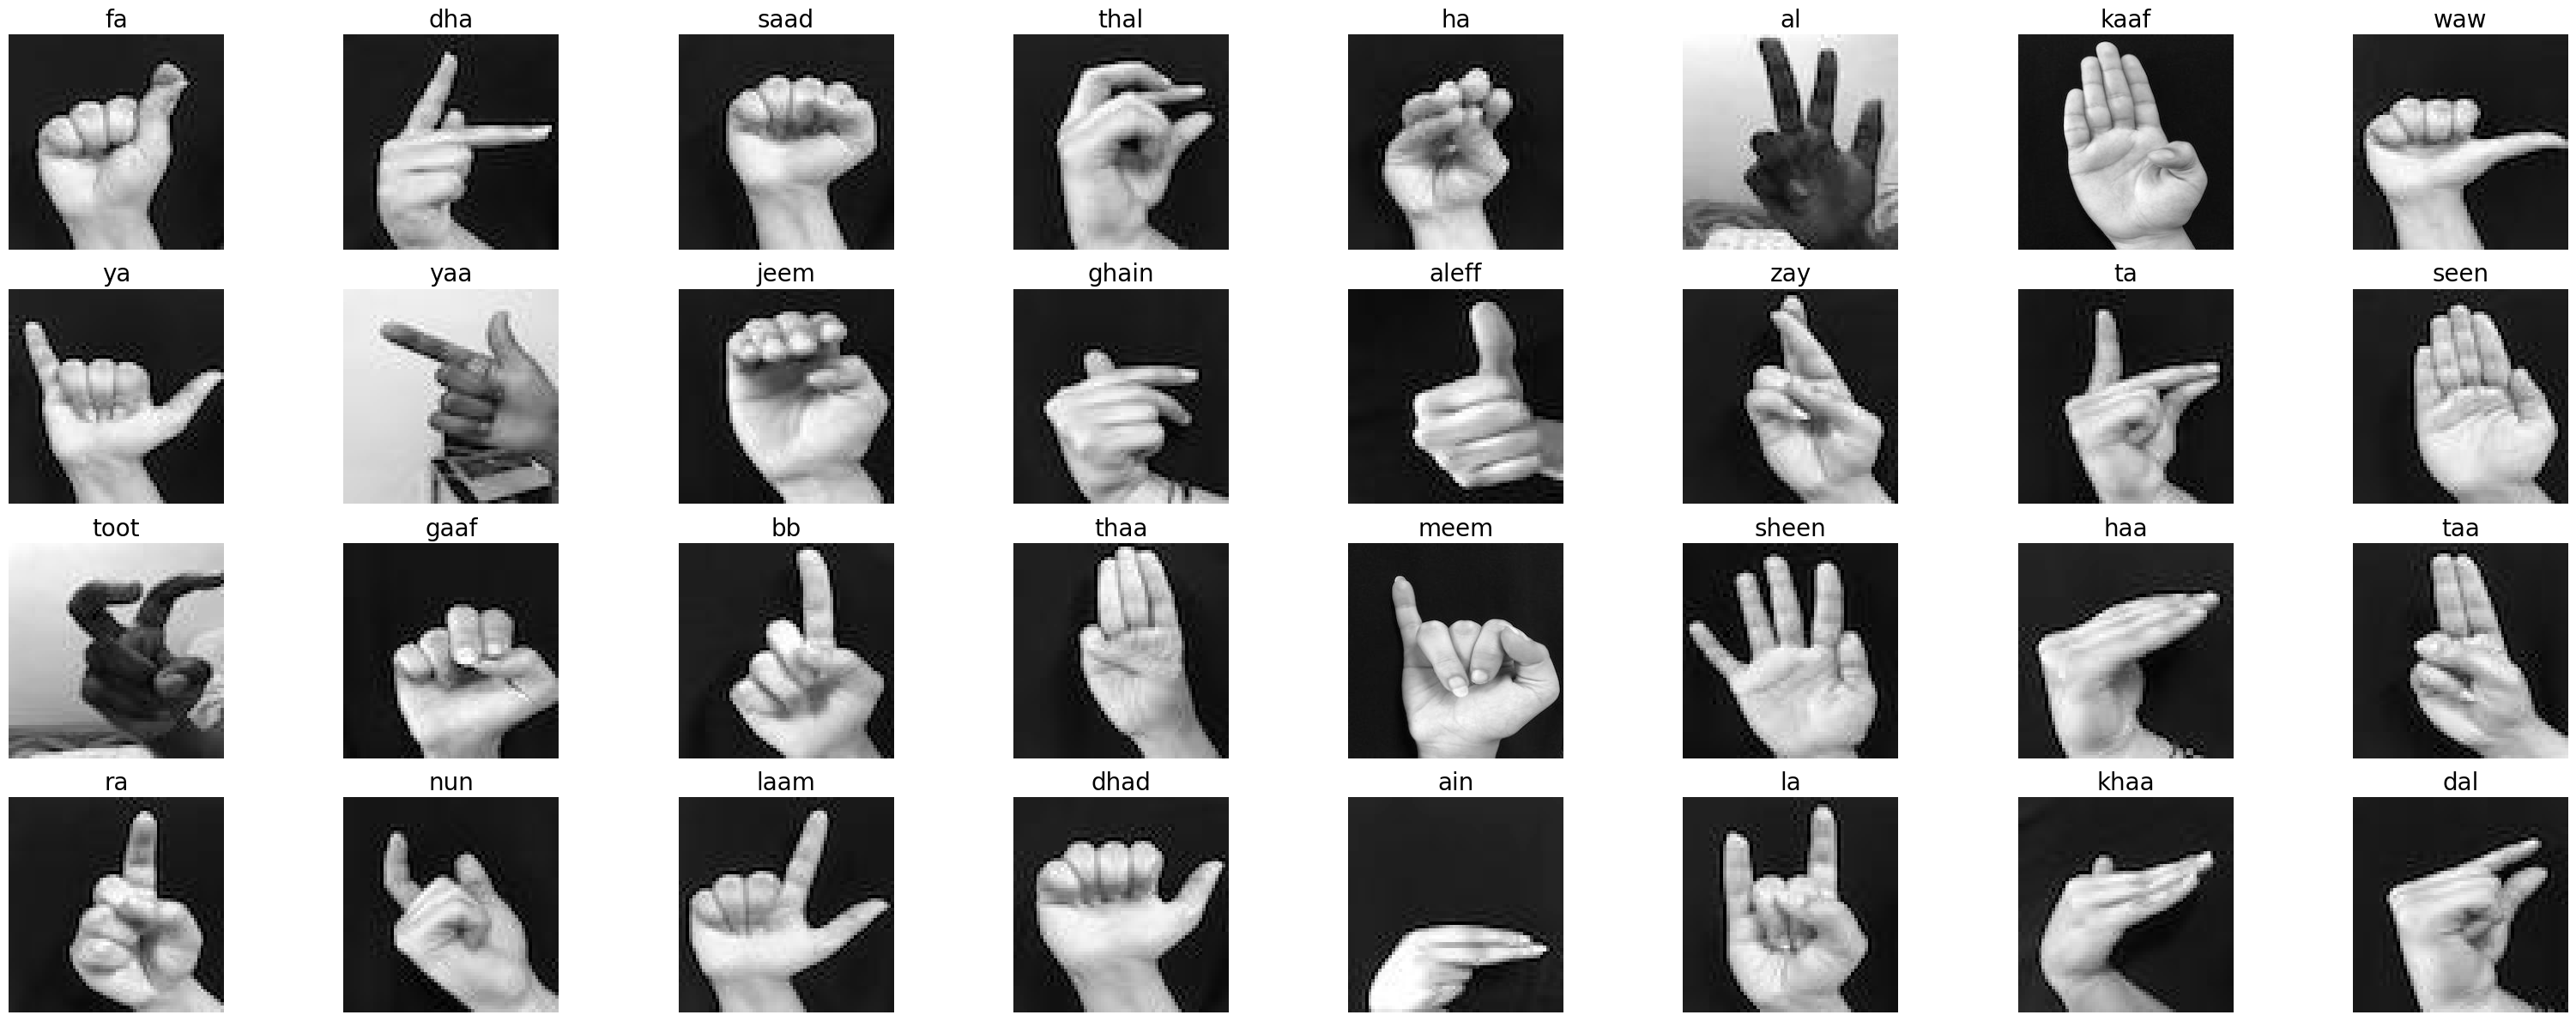

In [138]:
# Examples of all signs (best quality)

# Get one image for each label
label_to_image = {}
for label in df['label'].unique():
    label_df = df[df['label'] == label]
    variances = [np.var(np.array(image)) for image in label_df['image']]
    max_idx = np.argmax(variances)
    label_to_image[label] = label_df.iloc[max_idx]['image']

# Create a figure with subplots
fig, axs = plt.subplots(nrows=int(np.ceil(len(label_to_image) / 8)), ncols=8, figsize=(32, 12))

# Loop over each label and plot the corresponding image
for i, (label, image) in enumerate(label_to_image.items()):
    row = i // 8
    col = i % 8
    axs[row, col].imshow(image, cmap='gray')
    axs[row, col].set_title(label, fontsize=20)
    axs[row, col].axis('off')

# Adjust spacing and display the plot
fig.tight_layout()
plt.show()

In [139]:
img = df.loc[0, "image"]
img.size

(64, 64)

Text(0.5, 1.0, 'square root size vs. aspect ratio')

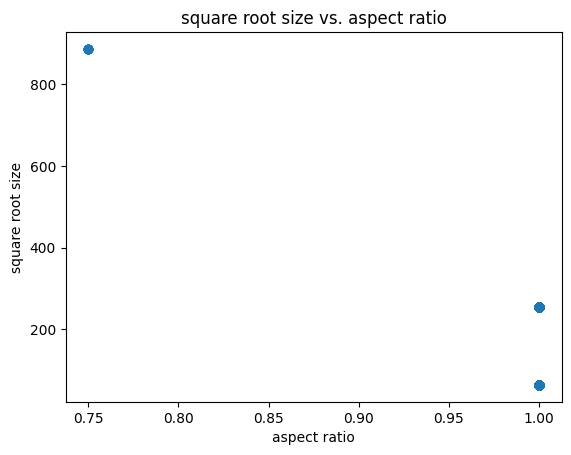

In [140]:
# plot the square root size vs aspect ratio to get outliers

# first calculate the square root size and the aspect ratio
square_root_size = []
aspect_ratio = []
for image in df['image']:
  #size of the images in pixels
  width, height = image.size
  
  #calculate the square root size
  sqrt_size = (width * height) ** 0.5
  square_root_size.append(sqrt_size)

  #cxalculate the aspect_ration
  aspt_rt = width/height
  aspect_ratio.append(aspt_rt)

# plot the data
fig, ax = plt.subplots()
ax.scatter(aspect_ratio, square_root_size)

# add labels and a title
ax.set_xlabel("aspect ratio")
ax.set_ylabel("square root size")
ax.set_title("square root size vs. aspect ratio")

# show the plot

since the pictures were alraedy preprocessed so that the size of the pictures is (64, 64) this picture is not strange. We nevertheless see, that there are outlier, which we will now investigate

In [141]:
# Find rows where the image size is not (64,64)
non_6464_rows = df[df['image'].apply(lambda x: x.size) != (64,64)]

# get information about these rows
#get the total number of pictures that are not size (64,64)
num_pics_64 = len(non_6464_rows)
num_pics = len(df)
Perc_of_whole = num_pics_64/num_pics * 100
print("Number of pictures with different size:\n")
print(num_pics_64)
print("That is", f"{Perc_of_whole:.2f}%", "of the whole dataset \n")

#split the information per category
label_counts_64 = non_6464_rows['label'].value_counts()
label_counts = df['label'].value_counts()
print("Number and Percentage of different sized pictures per Label:")
print("(The Percentage refers to the number of all pictures of that label:\n")
for label, count in label_counts_64.items():
    percentage = count/label_counts[label] * 100
    print(f"{label}: {count} ({percentage:.2f}%)")

Number of pictures with different size:

370
That is 0.54% of the whole dataset 

Number and Percentage of different sized pictures per Label:
(The Percentage refers to the number of all pictures of that label:

kaaf: 242 (8.60%)
meem: 118 (8.45%)
haa: 10 (0.87%)


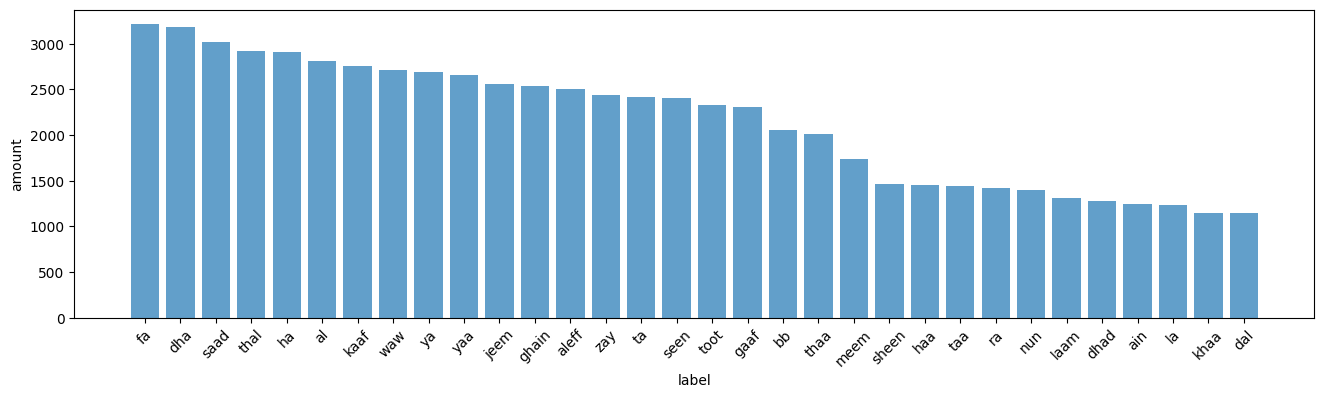

In [142]:
# Barplot of different Categories
Label = df['label'].unique()
plt.figure(figsize=(16,4))
plt.bar(range(len(label_counts)), label_counts, alpha = .7)
plt.xticks(range(len(label_counts)), Label, rotation = 45)
plt.xlabel("label")
plt.ylabel("amount")
plt.show()

# Preprocessing

In [143]:
# Check for Duplicates
# This function computes the hash of an image
def compute_hash(image):
    phash = imagehash.phash(image)
    return str(phash)

# Create a new column 'hash' in the data frame with the hash of each image
df['hash'] = df['image'].apply(compute_hash)

# Check for duplicates based on the hash values
unique_values = df['hash'].nunique()
duplicates = df[df.duplicated(['hash'])]
len(duplicates)

print(unique_values)
print(len(duplicates))
print(len(df) - len(duplicates))

# drop the duplicates
df.drop_duplicates(subset=['hash'], inplace=True)
len(df)

27513
41220
27513


27513

In [144]:
#get the total number of pictures in the dataset
num_pics = len(df)
print("Number of pictures in the dataset:\n")
print(num_pics, "\n")

#get the total number of pictures per category and the corresponding percentage
label_counts = df['label'].value_counts()
print("Number and Percentage of pictures per Label:\n")
for label, count in label_counts.items():
    percentage = count/num_pics * 100
    print(f"{label}: {count} ({percentage:.2f}%)")

Number of pictures in the dataset:

27513 

Number and Percentage of pictures per Label:

ain: 1111 (4.04%)
ghain: 1062 (3.86%)
fa: 1008 (3.66%)
saad: 970 (3.53%)
nun: 947 (3.44%)
meem: 937 (3.41%)
dha: 937 (3.41%)
laam: 936 (3.40%)
taa: 926 (3.37%)
toot: 916 (3.33%)
kaaf: 912 (3.31%)
gaaf: 907 (3.30%)
la: 906 (3.29%)
ta: 904 (3.29%)
dhad: 846 (3.07%)
seen: 842 (3.06%)
thaa: 837 (3.04%)
thal: 832 (3.02%)
ra: 831 (3.02%)
ya: 823 (2.99%)
bb: 813 (2.95%)
ha: 812 (2.95%)
dal: 811 (2.95%)
aleff: 810 (2.94%)
yaa: 794 (2.89%)
al: 775 (2.82%)
khaa: 768 (2.79%)
haa: 755 (2.74%)
jeem: 734 (2.67%)
sheen: 730 (2.65%)
zay: 663 (2.41%)
waw: 658 (2.39%)


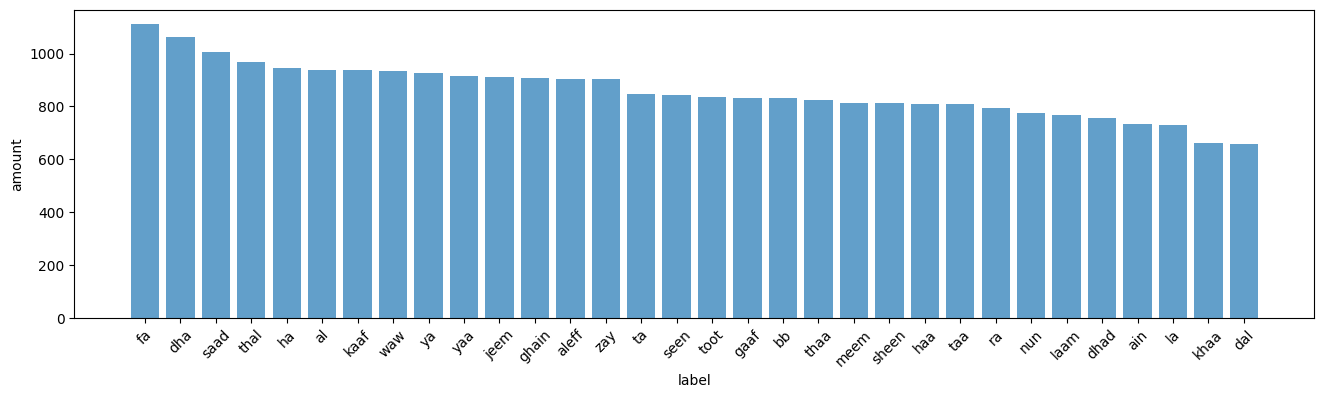

In [145]:
# Barplot of different Categories
Label = df['label'].unique()
plt.figure(figsize=(16,4))
plt.bar(range(len(label_counts)), label_counts, alpha = .7)
plt.xticks(range(len(label_counts)), Label, rotation = 45)
plt.xlabel("label")
plt.ylabel("amount")
plt.show()

In [146]:
# Find rows where the image size is not (64,64)
non_6464_rows = df[df['image'].apply(lambda x: x.size) != (64,64)]

# get information about these rows
#get the total number of pictures that are not size (64,64)
num_pics_64 = len(non_6464_rows)
num_pics = len(df)
Perc_of_whole = num_pics_64/num_pics * 100
print("Number of pictures with different size:\n")
print(num_pics_64)
print("That is", f"{Perc_of_whole:.2f}%", "of the whole dataset \n")

#split the information per category
label_counts_64 = non_6464_rows['label'].value_counts()
label_counts = df['label'].value_counts()
print("Number and Percentage of different sized pictures per Label:")
print("(The Percentage refers to the number of all pictures of that label:\n")
for label, count in label_counts_64.items():
    percentage = count/label_counts[label] * 100
    print(f"{label}: {count} ({percentage:.2f}%)")

Number of pictures with different size:

94
That is 0.34% of the whole dataset 

Number and Percentage of different sized pictures per Label:
(The Percentage refers to the number of all pictures of that label:

meem: 49 (5.23%)
kaaf: 39 (4.28%)
haa: 6 (0.79%)


In [147]:
# This is a function to resize an image to a fixed size of (64,64)
def resize_image(image, size=(64, 64)):
    """Resizes an image to a specific size using PIL"""
    return image.resize(size)

# Apply the resize function to each image in the dataframe
df['image'] = df['image'].apply(resize_image)

In [148]:
# Find rows where the image size is not (64,64)
non_6464_rows = df[df['image'].apply(lambda x: x.size) != (64,64)]

# get information about these rows
#get the total number of pictures that are not size (64,64)
num_pics_64 = len(non_6464_rows)
num_pics = len(df)
Perc_of_whole = num_pics_64/num_pics * 100
print("Number of pictures with different size:\n")
print(num_pics_64)
print("That is", f"{Perc_of_whole:.2f}%", "of the whole dataset \n")

#split the information per category
label_counts_64 = non_6464_rows['label'].value_counts()
label_counts = df['label'].value_counts()
print("Number and Percentage of different sized pictures per Label:")
print("(The Percentage refers to the number of all pictures of that label:\n")
for label, count in label_counts_64.items():
    percentage = count/label_counts[label] * 100
    print(f"{label}: {count} ({percentage:.2f}%)")

Number of pictures with different size:

0
That is 0.00% of the whole dataset 

Number and Percentage of different sized pictures per Label:
(The Percentage refers to the number of all pictures of that label:



In [149]:
# Normalization
# Rescaling the pictures to a fixed size
# function to rescale the pixel values of an image
def rescale_image(image):
    return tf.keras.preprocessing.image.img_to_array(image) / 255.0

# Apply the rescaling function to all images in the DataFrame
df['image'] = df['image'].apply(rescale_image)

In [150]:
# PCA
# But LabelEncoder and first train_test_split
X = df['image']
y = df['label']

encoder = LabelEncoder()
y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

data = {'image': X_train, 'label': y_train}
df_train = pd.DataFrame(data)

print(df_train.head())

                                                   image  label
4400   [[[0.91764706], [0.91764706], [0.91764706], [0...     20
57972  [[[0.9019608], [0.9019608], [0.9019608], [0.90...     19
60090  [[[0.69803923], [0.69803923], [0.69803923], [0...     18
16116  [[[0.11372549], [0.11372549], [0.11372549], [0...      2
55407  [[[0.9098039], [0.9098039], [0.9098039], [0.90...     11


In [151]:
#get the total number of pictures in the dataset
num_pics = len(df_train)
print("Number of pictures in the dataset:\n")
print(num_pics, "\n")

#get the total number of pictures per category and the corresponding percentage
label_counts = df_train['label'].value_counts()
print("Number and Percentage of pictures per Label:\n")
for label, count in label_counts.items():
    percentage = count/num_pics * 100
    print(f"{label}: {count} ({percentage:.2f}%)")

Number of pictures in the dataset:

22010 

Number and Percentage of pictures per Label:

0: 883 (4.01%)
9: 851 (3.87%)
7: 823 (3.74%)
17: 773 (3.51%)
18: 769 (3.49%)
5: 759 (3.45%)
20: 754 (3.43%)
24: 745 (3.38%)
23: 735 (3.34%)
15: 735 (3.34%)
16: 730 (3.32%)
8: 728 (3.31%)
27: 728 (3.31%)
13: 723 (3.28%)
21: 682 (3.10%)
6: 677 (3.08%)
29: 669 (3.04%)
26: 666 (3.03%)
3: 658 (2.99%)
4: 655 (2.98%)
25: 655 (2.98%)
19: 654 (2.97%)
10: 646 (2.94%)
2: 641 (2.91%)
1: 625 (2.84%)
14: 614 (2.79%)
11: 607 (2.76%)
30: 602 (2.74%)
12: 591 (2.69%)
22: 575 (2.61%)
31: 542 (2.46%)
28: 515 (2.34%)


In [158]:
#PCA
# Reshape the image data to a 2D array
X_train_2d = np.array(X_train.tolist()).reshape(len(X_train), -1)

# Perform PCA on the training set
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_2d)

# Print the explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [4.67322379e-01 9.27536264e-02 5.63459620e-02 2.99267583e-02
 2.74848621e-02 2.09054668e-02 1.70643814e-02 1.55348768e-02
 1.29290605e-02 1.07763940e-02 9.61842388e-03 8.45116377e-03
 7.72867072e-03 6.64931070e-03 6.47478877e-03 6.12246385e-03
 5.67359570e-03 5.47416322e-03 5.27163316e-03 4.56660241e-03
 4.28090710e-03 4.04375279e-03 3.73265427e-03 3.64002003e-03
 3.47451773e-03 3.33363959e-03 3.26622208e-03 2.99671618e-03
 2.89259735e-03 2.81432667e-03 2.66007660e-03 2.54368479e-03
 2.42583058e-03 2.25952431e-03 2.18075188e-03 2.13883515e-03
 2.06426880e-03 1.98956369e-03 1.94620457e-03 1.83994952e-03
 1.76741008e-03 1.75621035e-03 1.70465780e-03 1.67530868e-03
 1.57583726e-03 1.52381638e-03 1.50475663e-03 1.46782922e-03
 1.38942781e-03 1.32495025e-03 1.30986504e-03 1.27187918e-03
 1.26690359e-03 1.21499121e-03 1.19152712e-03 1.14785193e-03
 1.12338655e-03 1.10845664e-03 1.07865839e-03 1.04808761e-03
 1.03408925e-03 1.01310387e-03 9.71265486e-04 9.33510193e-0

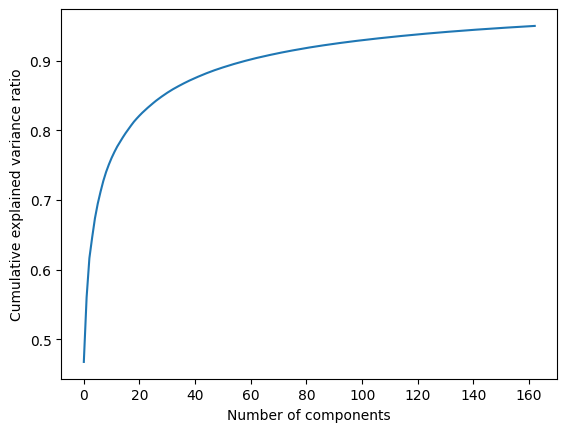

In [159]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance ratio')
plt.show()

Preprocessing Steps

3. RGB anomaly (do we need that?)








IDEA:
own CNN model
two pretrained model (Very Deep Convolutional Networks for Large-Scale Image Recognition(VGG-16), Inception, ResNet50, EfficientNet)

#### Very Deep Convolutional Networks for Large-Scale Image Recognition(VGG-16)

https://www.robots.ox.ac.uk/~vgg/publications/2015/Simonyan15/simonyan15.pdf



*   it was and remains THE model to beat even today
*   The advantages of the VGG-16 architecture are its simplicity, its relatively small number of parameters (compared to more recent architectures like ResNet and DenseNet), and its good performance on a wide range of image classification tasks.
*   high computational cost, which makes it slower to train and evaluate than some other architectures. Another disadvantage is its high memory usage, which can make it difficult to train on limited hardware resources.



Architecture:
Convolutional Layers = 13
Pooling Layers = 5
Dense Layers = 3

Parameter to chose:
*   The learning rate
*   The batch size
*   The number of epochs
*   The regularization method
*   The number of classes


Preprocessing needed:
*   Resizing to a fixed size (usually 224x224 pixels) 
*   Normalization (zero mean and unit variance)
*   Data augmentation (maybe more filtering?)
--> all with Preprocessing function (use library such as Keras or TensorFlow)
- Filtering (Corrupted images, low-quality images, Irrelevant images) --> libraries such as OpenCV, Pillow, or scikit-image

VGG-16 is a deep neural network model for image classification that is trained on millions of images. It consists of 16 layers of convolutional and fully connected neural network layers. The convolutional layers learn the features of the image at different levels of abstraction, while the fully connected layers combine these features to make a prediction about the image class. 

Implementation steps:
- Preprocess your input images by resizing them to the appropriate size and normalizing their pixel values to improve training efficiency.
- Load the VGG-16 model architecture and its pre-trained weights using a deep learning framework such as TensorFlow, Keras, or PyTorch.
- Compile the model with an appropriate optimizer and loss function for your task.
- Train the model on your training data using a suitable batch size and number of epochs.
- Evaluate the model's performance on a validation set to monitor its progress and make any necessary adjustments to the hyperparameters or architecture.
- Once the model is trained and validated, use it to make predictions on new images by passing them through the model and interpreting the output probabilities.
- Finally, fine-tune the model if necessary by retraining it on your dataset with a smaller learning rate to adjust the pre-trained weights to your specific task



#### Inception

https://www.analyticsvidhya.com/blog/2018/10/understanding-inception-network-from-scratch/?utm_source=blog&utm_medium=top4_pre-trained_image_classification_models

*   much smaller than the then prevalent models like VGG
*   unique architecture called an Inception module, which allows the model to perform multiple convolutions with different filter sizes and pooling operations in parallel
- capture features of different sizes and resolutions, which can improve the accuracy of the model
 - achieve state-of-the-art accuracy on large-scale image classification tasks while using fewer parameters and less computational resources than other deep learning models
 - architecture is more complex than other models, which can make it more difficult to train and optimize
 - large number of hyperparameters involved in the model's architecture can make it more challenging to fine-tune for specific datasets

Parameter to chose:
*   The learning rate
*   The batch size
*   The number of epochs
*   The regularization parameters
- optimizer
- input size
- number of layers
* number of filters

Preprocessing needed:
*   Resizing to a fixed size (usually 224x224 pixels) 
*   Normalization (zero mean and unit variance)
*   Data augmentation (maybe more filtering?)
--> all with Preprocessing function (use library such as Keras or TensorFlow)
- Filtering (Corrupted images, low-quality images, Irrelevant images) --> libraries such as OpenCV, Pillow, or scikit-image

Using multiple parallel convolutional layers with different kernel sizes to capture both fine-grained and coarse-grained features of an image. This allows the model to learn complex features from images with fewer parameters than traditional convolutional neural networks.

The Inception model also incorporates a technique called "dimensionality reduction" to reduce the computational cost of the model. This involves using 1x1 convolutions to reduce the number of input channels to a layer, which reduces the number of computations required to process the image.

Implementation steps:
- Install the necessary deep learning libraries, such as TensorFlow or Keras.
- Download the Inception model pre-trained on a large dataset, such as ImageNet.
- Load the pre-trained model into your Python code using the deep learning library's API.
- Adjust the final layer of the model to match the number of classes in your specific dataset.
- Load your own dataset, preprocess the images, and split the data into training and validation sets.
- Train the Inception model on your dataset using a suitable optimizer and loss function.
- Evaluate the performance of the trained model on the validation set and fine-tune the hyperparameters as necessary.
- Once the model is trained and optimized, use it to make predictions on new images.

It is also important to note that implementing the Inception model can be computationally intensive, especially on large datasets. Therefore, it is recommended to use a GPU for faster training and inference times.

#### Summary

The Inception model is best suited for large and complex datasets with a wide range of features and classes. (may require more powerful hardware and longer training times) good for: highly effective for tasks such as object detection and image segmentation

The VGG-16 model, on the other hand, is simpler and more lightweight than the Inception model, making it more suitable for smaller datasets or simpler tasks. good for: image classification tasks